<a href="https://colab.research.google.com/github/FuriouStyles/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Stephen_P_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [3]:
sales_last_week = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

slw_mean = sum(sales_last_week)/len(sales_last_week)

sales_last_week_dist = [i - slw_mean for i in sales_last_week]
sales_last_week_dist_sq = [i**2 for i in sales_last_week_dist]

slw_variance = sum(sales_last_week_dist_sq)/slw_mean

slw_mean, slw_variance

(3052.714285714286, 421.3717066778978)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [4]:
import numpy as np
import pandas as pd

customers_last_week = [127, 80, 105, 92, 120, 115, 93]

df = pd.DataFrame({'sales': sales_last_week, 'customers': customers_last_week})

df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [5]:
clw_mean = sum(customers_last_week)/len(customers_last_week)

clw_dist_sq = [(i - clw_mean)**2 for i in customers_last_week]

clw_var = sum(clw_dist_sq)/len(customers_last_week)

clw_var, np.var(customers_last_week), df.corr()

(249.3877551020408, 249.3877551020408,               sales  customers
 sales      1.000000   0.962834
 customers  0.962834   1.000000)

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [6]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [7]:
titanic_numeric = titanic.drop(columns=['Unnamed: 0', 'name', 'sex', 'cabin', 'home.dest', 'ticket', 'boat', 'embarked'])
titanic_numeric.fillna(method='backfill', inplace=True)
titanic_numeric.fillna(method='ffill', inplace=True)
titanic_numeric.head()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,211.3375,135.0,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,135.0,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,135.0,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,22.0,1


In [8]:
titanic_numeric.var()

pclass                 0.701812
survived               0.236181
age                  165.850021
sibsp                  1.084413
parch                  0.748735
fare                2675.851605
body                9088.098312
has_cabin_number       0.174613
dtype: float64

In [9]:
titanic_numeric.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312816,-0.366271,0.060502,0.018030,-0.558855,0.011328,-0.713932
survived,-0.312816,1.000000,-0.050187,-0.027529,0.082901,0.244695,-0.069915,0.302469
age,-0.366271,-0.050187,1.000000,-0.190730,-0.130862,0.170597,-0.052767,0.271887
sibsp,0.060502,-0.027529,-0.190730,1.000000,0.373689,0.160540,0.067914,-0.008865
parch,0.018030,0.082901,-0.130862,0.373689,1.000000,0.221798,0.027359,0.036982
fare,-0.558855,0.244695,0.170597,0.160540,0.221798,1.000000,0.008265,0.507452
body,0.011328,-0.069915,-0.052767,0.067914,0.027359,0.008265,1.000000,-0.024961
has_cabin_number,-0.713932,0.302469,0.271887,-0.008865,0.036982,0.507452,-0.024961,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
one = [-1, 2]

'''
ax + by = 0
-1*3 + 2y = 0
-3 + 2y = 0
2y = 3
y = 3/2
'''

two = [3, 1.5]

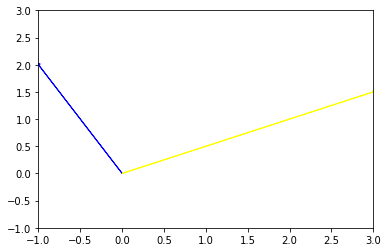

0.0

In [11]:
import matplotlib.pyplot as plt

plt.arrow(0,0, one[0], one[1],head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, two[0], two[1],head_width=.05, head_length=0.05, color ='yellow')
plt.xlim(-1,3)          
plt.ylim(-1,3)
plt.show()

np.dot(one, two)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [14]:
'''
if a = [h, i, j] and b = [x, y, z]

then hx + iy + jz = 0 must be true for a and b to be orthogonal
'''

if (-5*6 + 3*-8 + 7*2) == 0:
  print('Vectors a and b are orthogonal because their dot product equals zero')
else:
  print('Vectors a and b are NOT orthogonal because their dot product does not equal zero')

Vectors a and b are NOT orthogonal because their dot product does not equal zero


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [18]:
c = np.array([2, -15, 6, 20])

c_norm_sq = (np.sqrt(2**2 + -15**2 + 6**2 + 20**2))**2

c_dot = 2*2 + -15*-15 + 6*6 + 20*20

c_t_c = [2*2, -15*-15, 6*6, 20*20]

c_norm_sq, c_dot, c_t_c

(215.0, 665, [4, 225, 36, 400])

In [17]:
c*c.T

array([  4, 225,  36, 400])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
 d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
 e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}

While this is bit below is nice, I did this first but it's not what the question was asking for! I'll keep it though to demonstrate that I'm comfortable with the subject matter, though :)

\begin{align}
 ||d|| = \sqrt{7^2 + 12^2} = \sqrt{49 + 144} = \sqrt{193} = 13.89244
\end{align}

\begin{align}
 \hat{d} = \frac{1}{||d||}d = \frac{1}{13.89244}\begin{bmatrix} 7 \\ 12 \end{bmatrix} = \begin{bmatrix} \frac{7}{13.89244} \\ \frac{12}{13.89244} \\ \end{bmatrix} = \begin{bmatrix} 0.5038 \\ 0.86378 \end{bmatrix}
\end{align}


\begin{align}
 ||e|| = \sqrt{2^2 + 11^2 + -8^2} = \sqrt{4 + 121 + -64} = \sqrt{61} = 7.81025
\end{align}

\begin{align}
 \hat{e} = \frac{1}{||e||}e = \frac{1}{7.81025}\begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = \begin{bmatrix} \frac{2}{7.81025} \\ \frac{11}{7.81025} \\ \frac{-8}{7.81025}\end{bmatrix} = \begin{bmatrix} 0.25607 \\ 1.40841 \\ -1.02429 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [28]:
f = np.array([4, 12, 11, 9, 2])
f_norm = np.sqrt(f[0]**2 + f[1]**2 + f[2]**2 + f[3]**2 + f[4]**2)
f_hat = np.array([i/f_norm for i in f])
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

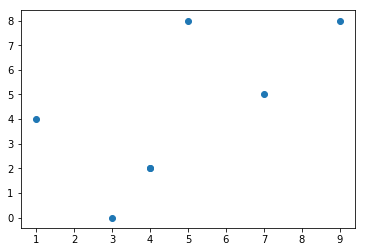

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()